In [1]:
# 파이차트 : 원을 파이 조각처럼 나누어서 표현
# 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례
# plot() 메소드에 kind = 'pie' 옵션을 사용하여 그림

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./data/auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'accerleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1 # 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 열 만듬
df_origin = df.groupby('origin').sum(numeric_only = True) # origin 열을 기준으로 그룹화, 합계 연산
# groupby() 함수는 특정 열을 기준으로 데이터를 그룹화 , numeric_only=True**는 숫자형(numeric) 데이터만 합산
df_origin.head()

,mpg,cylinders,displacement,weight,accerleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [5]:
# 제조국가 (origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA','EU','JAPAN']
df_origin.head()

,mpg,cylinders,displacement,weight,accerleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


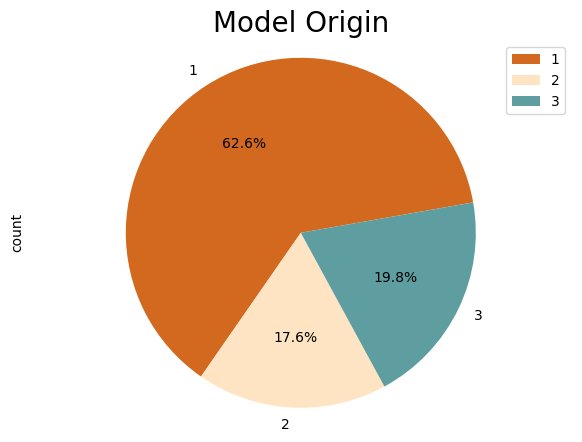

In [27]:
# 각 제조국가별로 데이터 값들의 합계 중에서 우리가 사용할 데이터는 'count'열 
# 여기에 plot() 메소드를 적용하면 국가열 점유율을 나타내는 파이차트를 그림
df_origin['count'].plot(kind = 'pie',
                        figsize = (7,5),
                        autopct = '%1.1f%%', # 소수점 이하 첫째 자리까지 표기
                        startangle = 10, # 파이 조각을 나누는 시작 위치 (각도 표시)
                        colors = ['chocolate','bisque','cadetblue']
                       )

plt.title('Model Origin', size = 20)
plt.axis('equal')
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

In [29]:
# autopct = '%1.1f%%' (포맷 문자열)
# autopct 옵션은 문자열 포맷 코드를 사용하여 파이 차트의 각 조각에 대한 비율을 표시하는 형식을 지정
# %1.1f 부분 : 비율을 부동소수점 형식으로 표시하되, 최소한 하나의 숫자를 정수 부분으로 가지며(%1),
# 소수점 아래는 하나의 숫자만 표시하도록(%.1f)설정한다
# %% 부분 : 퍼센트 기호를 문자열에 포함시키기 위한 이스케이프 시퀀스. % 문자 자체를 출력하고자 할 때 %% 두 번 입력